VALIDACION CRUZADA 
En scikit-learn, el parámetro scoring en la función cross_val_score y otras funciones similares puede tomar una variedad de valores según el tipo de problema que estés abordando. Aquí hay algunos valores comunes que se pueden usar:

Problemas de Regresión:
'explained_variance': Varianza explicada.
'neg_mean_absolute_error': Error absoluto medio negativo.
'neg_mean_squared_error': Error cuadrático medio negativo.
'neg_root_mean_squared_error': Raíz del error cuadrático medio negativo.
'neg_mean_squared_log_error': Error cuadrático medio logarítmico negativo.
'neg_median_absolute_error': Error absoluto mediano negativo.
'r2': Coeficiente de determinación R^2.
Problemas de Clasificación:
'accuracy': Precisión.
'balanced_accuracy': Precisión balanceada.
'f1': Puntuación F1.
'f1_micro': Puntuación F1 (micro-averaged).
'f1_macro': Puntuación F1 (macro-averaged).
'f1_weighted': Puntuación F1 (ponderado).
'roc_auc': Área bajo la curva ROC.
'average_precision': Precisión promedio.
'precision': Precisión.
'recall': Recall.
'jaccard': Coeficiente de Jaccard.
Problemas de Clustering:
'adjusted_rand_score': Índice de Rand ajustado.
'adjusted_mutual_info_score': Información mutua ajustada.
Personalizado:
También puedes pasar tu propia función de puntuación si ninguna de las métricas predeterminadas satisface tus necesidades.

Estos son solo algunos ejemplos comunes, pero hay muchas más métricas disponibles en la biblioteca scikit-learn. La elección de la métrica de puntuación depende del problema específico que estés abordando y de lo que estés tratando de optimizar. Es importante seleccionar una métrica que sea relevante para la tarea y que refleje tus objetivos comerciales o de investigación.

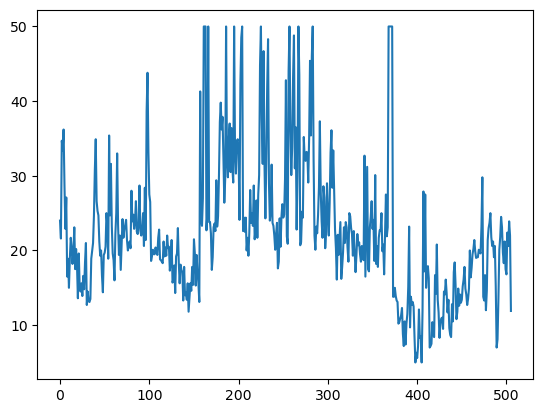

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset=pd.read_csv('F:/CAPACITACION/MODELO MLEARNING/recursos/BostonHousing.csv')

X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

plt.plot(y)


LASSO

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)

# convertir tl resultado de cv en un df
resultados = pd.DataFrame(lasso_regressor.cv_results_,columns=['params','mean_test_score', 'rank_test_score'])

resultados.sort_values( 'rank_test_score')

D:\Programas\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
D:\Programas\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
D:\Programas\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+03, tolerance: 2.8

,params,mean_test_score,rank_test_score
5,{'alpha': 1},-35.531580,1
4,{'alpha': 0.01},-36.200735,2
3,{'alpha': 0.001},-37.025594,3
2,{'alpha': 1e-08},-37.131806,4
1,{'alpha': 1e-10},-37.131807,5
0,{'alpha': 1e-15},-37.131807,6
6,{'alpha': 5},-43.102157,7
7,{'alpha': 10},-46.473577,8
8,{'alpha': 20},-56.333030,9
9,{'alpha': 30},-69.575002,10


In [6]:
print(lasso_regressor.best_params_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_lasso=lasso_regressor.predict(X_test)

{'alpha': 1}
